<a href="https://colab.research.google.com/github/Sid-Deshpande/movie_recommendation_system/blob/main/Copy_of_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT Name - AIRBNB BOOKING ANALYSIS

**Type - EDA**

# Problem Statement

Analyze Airbnb booking data to gain insights into booking trends and preferences of users in a specific location. The goal of this project is to perform Exploratory Data Analysis (EDA) on the Airbnb dataset to answer key questions such as:


*   Are pivate rooms preffered over other room types
*   Is manhattan neighbourhood preffered more over other neighboured
*   Distribution of listing across neighbourhoods
*   Distribution of room types
*   What are the busiest times of the year for bookings in the area
*   What factors influence the pricing of listings?
*   What are the most popular neighborhoods for bookings
*   Are there any notable patterns or trends in the types of properties listed

By addressing these questions, the project aims to provide valuable insights to Airbnb hosts and potential guests, helping them make informed decisions regarding property management, pricing strategies, and travel plans.









## Importing the necessary libraries and mounting the drive

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading the dataset

In [3]:
airbnb_df = pd.read_csv('/content/drive/MyDrive/Assignment/Airbnb NYC 2019.csv')
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
# showing the dataframe from last |
airbnb_df.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
# lets find out the shape of the dataframe
airbnb_df.shape

(48895, 16)

In [6]:
list(airbnb_df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [7]:
# through this we can easily determined that which of the columns are categorical and numerical
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
# now lets find out that each column has how many unique values
airbnb_df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [9]:
# is there any duplicates or not
duplicate_rows = airbnb_df[airbnb_df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


so it is clear that there is no dupicate rows in a dataframe

In [10]:
# finding how many null values are there in a dataframe

airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
# many of the columns are not in use for our analysis.. so we have to drop that column

airbnb_df.drop(columns = ['id','latitude','longitude'],axis = 1,inplace = True)

In [12]:
airbnb_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [13]:
airbnb_df.shape

(48895, 13)

In [14]:
airbnb_df.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
airbnb_df['last_review'].unique()

array(['2018-10-19', '2019-05-21', nan, ..., '2017-12-23', '2018-01-29',
       '2018-03-29'], dtype=object)

In [16]:
# converting last_reviews data type object to datetime
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])

In [17]:
airbnb_df['last_review'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: last_review
Non-Null Count  Dtype         
--------------  -----         
38843 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 382.1 KB


# describe function here to tell you all the information regarding numericals columns in the dataframe

In [18]:
airbnb_df.describe()

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**now its time to handle the missing valuie**

In [19]:
'''since host_name and name are not important in our analysis but we can't just drop this column so we replace nan with unknown..
   and most probably we can replace the review_per_month column to its mean value'''

airbnb_df.fillna({'name':'unknown','host_name':'unknown','reviews_per_month':airbnb_df['reviews_per_month'].mean()}, inplace = True)


In [20]:
airbnb_df.isnull().sum()

name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [21]:
# Calculate the mean value of the existing dates
mean_date = airbnb_df['last_review'].mean()

# Fill NaN values with the mean date
airbnb_df['last_review'].fillna(mean_date, inplace=True)

In [22]:
airbnb_df.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [23]:
airbnb_df.sample(10)

,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
36104,"Pvt 1 full bed 10 min from JFK, close to Manha...",23370431,Melissa,Queens,Hollis,Private room,55,2,16,2019-06-19 00:00:00.000000000,1.710000,2,178
23340,Cheap cozy room lovely area airport and mall 1...,45601111,Dlb,Queens,Laurelton,Private room,37,2,8,2018-11-10 00:00:00.000000000,0.370000,5,0
16017,2 bedroom loft-like ground floor with patio,3710740,Daniel,Manhattan,Harlem,Entire home/apt,150,1,49,2019-06-21 00:00:00.000000000,1.300000,2,0
17975,Cozy Cool Room in my Charming Loft,51826974,Rose,Brooklyn,Canarsie,Private room,51,3,0,2018-10-04 01:47:23.910099456,1.373221,2,365
28633,Private ground floor apartment in Brooklyn,161976329,Chad Antonio,Brooklyn,East New York,Entire home/apt,55,3,58,2019-06-09 00:00:00.000000000,3.020000,1,57
24771,Mundo's World,15096876,Raymundo,Brooklyn,Bushwick,Private room,60,3,2,2017-07-31 00:00:00.000000000,0.080000,1,0
19575,HUGE CHEERFUL PRIVATE STUDIO SUITE WITH BACKYARD,21640001,Anna,Queens,Rego Park,Entire home/apt,95,2,7,2017-09-03 00:00:00.000000000,0.230000,1,345
34389,"Cute, Comfy Room in the Heart of Bedstuy",28943965,Daniel,Brooklyn,Bedford-Stuyvesant,Private room,55,2,3,2018-10-14 00:00:00.000000000,0.290000,1,0
41770,Recently Renovated & Furnished Apt- Room avail...,244008821,Sonia,Manhattan,West Village,Private room,2850,100,0,2018-10-04 01:47:23.910099456,1.373221,1,270
15901,Charming 1 BR in West Village,18975770,Martina,Manhattan,West Village,Entire home/apt,200,6,5,2018-11-24 00:00:00.000000000,0.240000,2,17


# now calculating the value counts of some categorical columns in the dataframe

In [24]:
neighborhood_counts = airbnb_df['neighbourhood_group'].value_counts()
neighborhood_counts

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

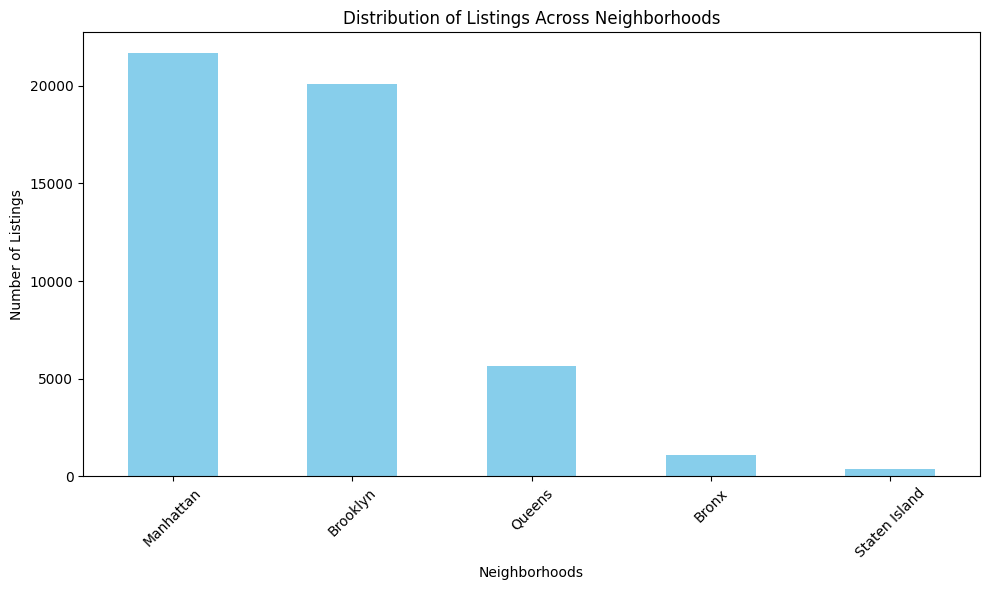

In [25]:
plt.figure(figsize=(10, 6))
neighborhood_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings Across Neighborhoods')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
list(airbnb_df['neighbourhood'])

['Kensington',
 'Midtown',
 'Harlem',
 'Clinton Hill',
 'East Harlem',
 'Murray Hill',
 'Bedford-Stuyvesant',
 "Hell's Kitchen",
 'Upper West Side',
 'Chinatown',
 'Upper West Side',
 "Hell's Kitchen",
 'South Slope',
 'Upper West Side',
 'West Village',
 'Williamsburg',
 'Fort Greene',
 'Chelsea',
 'Crown Heights',
 'East Harlem',
 'Williamsburg',
 'Park Slope',
 'Park Slope',
 'Park Slope',
 'Bedford-Stuyvesant',
 'Windsor Terrace',
 'Inwood',
 "Hell's Kitchen",
 'Inwood',
 'East Village',
 'Harlem',
 'Harlem',
 'Greenpoint',
 'Harlem',
 'Bedford-Stuyvesant',
 'South Slope',
 'Bedford-Stuyvesant',
 'Bushwick',
 'Flatbush',
 'Lower East Side',
 'East Village',
 'South Slope',
 'Fort Greene',
 'Upper West Side',
 'Harlem',
 'Prospect-Lefferts Gardens',
 'Long Island City',
 'Bedford-Stuyvesant',
 'Bedford-Stuyvesant',
 'Fort Greene',
 'Bedford-Stuyvesant',
 'Upper West Side',
 'Williamsburg',
 'Greenpoint',
 'Kips Bay',
 'Williamsburg',
 'Lower East Side',
 "Hell's Kitchen",
 'Greenpoi

In [27]:
airbnb_df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [28]:
roomtype_counts = airbnb_df['room_type'].value_counts()
roomtype_counts

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

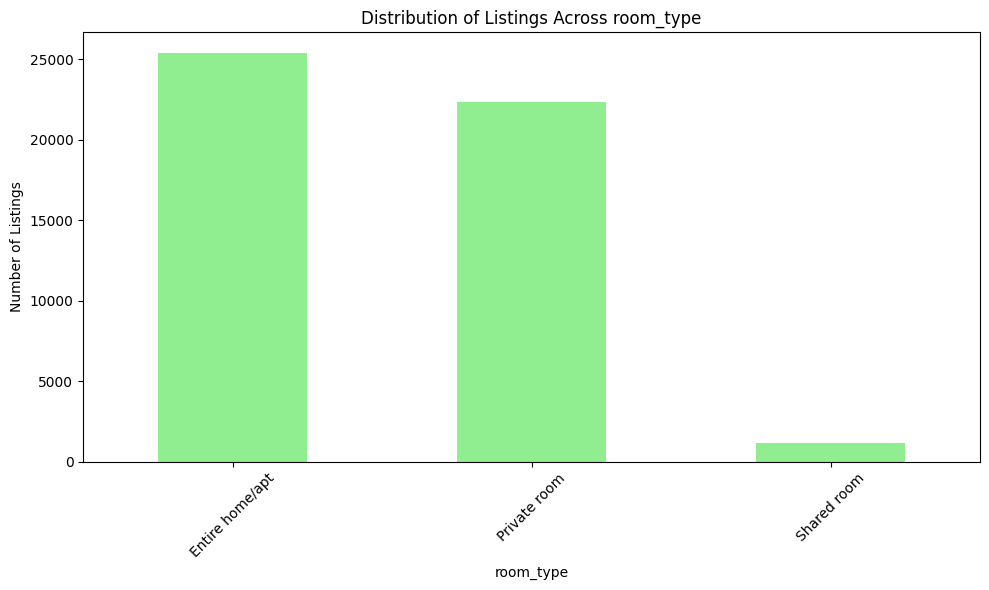

In [29]:
plt.figure(figsize=(10, 6))
roomtype_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('room_type')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings Across room_type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
airbnb_df

,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19 00:00:00.000000000,0.210000,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21 00:00:00.000000000,0.380000,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,2018-10-04 01:47:23.910099456,1.373221,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05 00:00:00.000000000,4.640000,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19 00:00:00.000000000,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2018-10-04 01:47:23.910099456,1.373221,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,2018-10-04 01:47:23.910099456,1.373221,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,2018-10-04 01:47:23.910099456,1.373221,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,2018-10-04 01:47:23.910099456,1.373221,6,2


**Which neighbourhood group has maximum number of reviews**

In [31]:
airbnb_df.groupby(['neighbourhood_group','neighbourhood','room_type'])['number_of_reviews'].max().reset_index().sort_values('number_of_reviews',ascending = False).head(10)

,neighbourhood_group,neighbourhood,room_type,number_of_reviews
398,Queens,Jamaica,Private room,629
273,Manhattan,Harlem,Private room,607
369,Queens,East Elmhurst,Private room,543
288,Manhattan,Lower East Side,Private room,540
214,Brooklyn,Park Slope,Entire home/apt,488
146,Brooklyn,Bushwick,Private room,480
379,Queens,Flushing,Private room,474
230,Brooklyn,South Slope,Entire home/apt,467
399,Queens,Jamaica,Shared room,454
259,Manhattan,East Village,Private room,451


**Which host are charging higher prices**

In [32]:
airbnb_df.groupby(['host_name','neighbourhood_group','neighbourhood','room_type','minimum_nights'])['price'].max().reset_index().sort_values('price',ascending = False).head(10)

,host_name,neighbourhood_group,neighbourhood,room_type,minimum_nights,price
20069,Kathrine,Queens,Astoria,Private room,100,10000
11846,Erin,Brooklyn,Greenpoint,Entire home/apt,5,10000
16782,Jelena,Manhattan,Upper West Side,Entire home/apt,30,10000
25220,Matt,Manhattan,Lower East Side,Entire home/apt,30,9999
29049,Olson,Manhattan,East Harlem,Entire home/apt,5,9999
2199,Amy,Manhattan,Lower East Side,Private room,99,9999
32027,Rum,Manhattan,Tribeca,Entire home/apt,30,8500
17323,Jessica,Brooklyn,Clinton Hill,Entire home/apt,1,8000
32397,Sally,Manhattan,Upper East Side,Entire home/apt,1,7703
32704,Sandra,Brooklyn,East Flatbush,Private room,1,7500


Now we are suppose to get some answer inside this dataframes

#1. are private rooms are more preferred than other room types.. lets see it through visualization

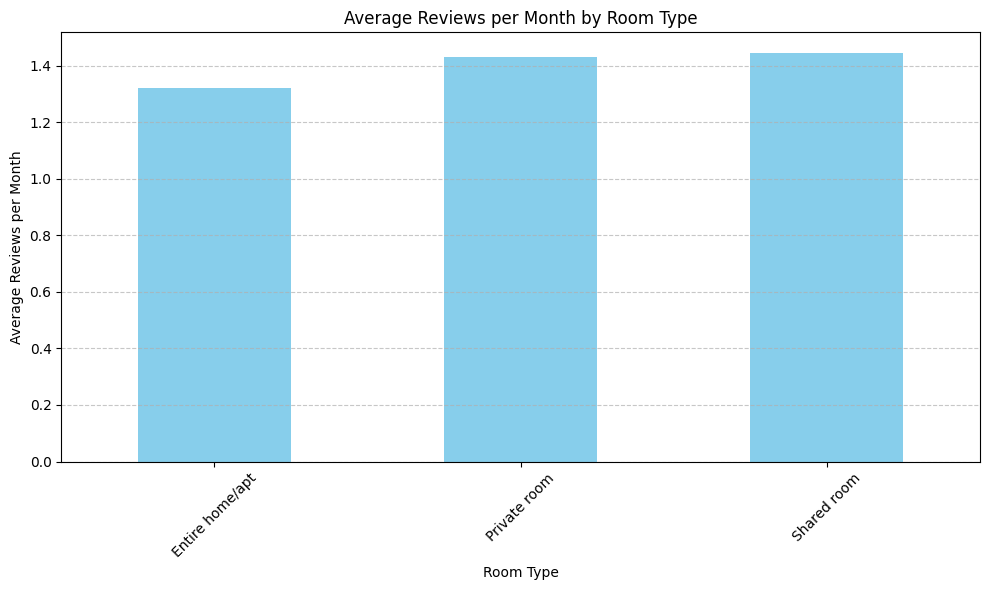

In [33]:

# Step 1: Filter the dataset for listings with different room types
room_types = airbnb_df['room_type'].unique()

# Step 2: Calculate the average number of reviews per month for each room type
avg_reviews_per_month = airbnb_df.groupby('room_type')['reviews_per_month'].mean()

# Step 3: Visualize the average number of reviews per month for different room types
plt.figure(figsize=(10, 6))
avg_reviews_per_month.plot(kind='bar', color='skyblue')
plt.title('Average Reviews per Month by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Reviews per Month')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Through this we can easliy see that private rooms are almost equally prefferable with shared rooms

we have found that shared rooms are more preffred than other room types

#2. Is manhattan neighbourhood preffered more over other neighboured

In [34]:
# Step 1: Filter the dataset for listings in Manhattan and other neighborhoods
manhattan_listings = airbnb_df[airbnb_df['neighbourhood_group'] == 'Manhattan']
other_listings = airbnb_df[airbnb_df['neighbourhood_group'] != 'Manhattan']

# Step 2: Calculate metrics such as average price or average number of reviews
avg_price_manhattan = manhattan_listings['price'].mean()
avg_price_other = other_listings['price'].mean()

# we can also take avg number of reviews also

# avg_reviews_manhattan = manhattan_listings['number_of_reviews'].mean()
# avg_reviews_other = other_listings['number_of_reviews'].mean()

# Step 3: Compare the metrics between Manhattan and other neighborhoods
if (avg_price_manhattan < avg_price_other):
    print("Manhattan neighborhood is preferred over other neighborhoods.")
elif (avg_price_manhattan > avg_price_other):
    print("Other neighborhoods are preferred over Manhattan.")
else:
    print("No significant preference observed between Manhattan and other neighborhoods.")


Other neighborhoods are preferred over Manhattan.


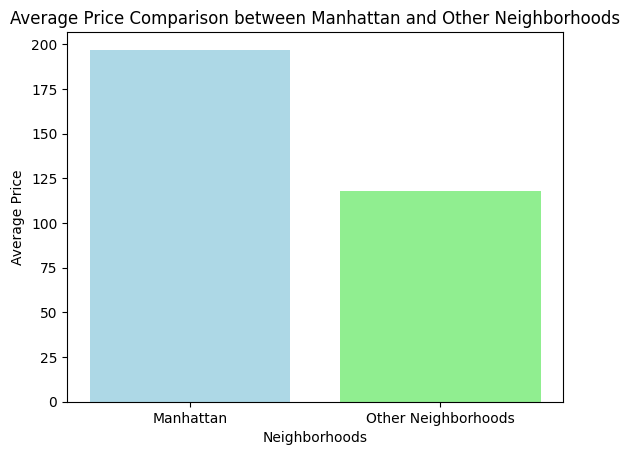

In [35]:
# lets visualize above code

# Create a bar plot to visualize the comparison
neighborhoods = ['Manhattan', 'Other Neighborhoods']
avg_prices = [avg_price_manhattan, avg_price_other]

plt.bar(neighborhoods, avg_prices, color=['lightblue', 'lightgreen'])
plt.xlabel('Neighborhoods')
plt.ylabel('Average Price')
plt.title('Average Price Comparison between Manhattan and Other Neighborhoods')
plt.show()


so we can clearly see that here avg price of manhattan is greater than others neighbourhood then other neighbourhood group is preffered  

#3. What factors influence the pricing of listings?

In [36]:
# Grouping the data by 'neighbourhood_group' and calculating average price
avg_price_by_neighbourhood_group = airbnb_df.groupby('neighbourhood_group')['price'].mean()

# Grouping the data by 'room_type' and calculating average price
avg_price_by_room_type = airbnb_df.groupby('room_type')['price'].mean()

# Grouping the data by 'minimum_nights' and calculating average price
avg_price_by_minimum_nights = airbnb_df.groupby('minimum_nights')['price'].mean()

# Grouping the data by 'number_of_reviews' and calculating average price
avg_price_by_number_of_reviews = airbnb_df.groupby('number_of_reviews')['price'].mean()

# Grouping the data by 'reviews_per_month' and calculating average price
avg_price_by_reviews_per_month = airbnb_df.groupby('reviews_per_month')['price'].mean()

# Grouping the data by 'calculated_host_listings_count' and calculating average price
avg_price_by_host_listings_count = airbnb_df.groupby('calculated_host_listings_count')['price'].mean()

# Grouping the data by 'availability_365' and calculating average price
avg_price_by_availability = airbnb_df.groupby('availability_365')['price'].mean()

Text(0.5, 1.0, 'Average Price by Neighbourhood Group')

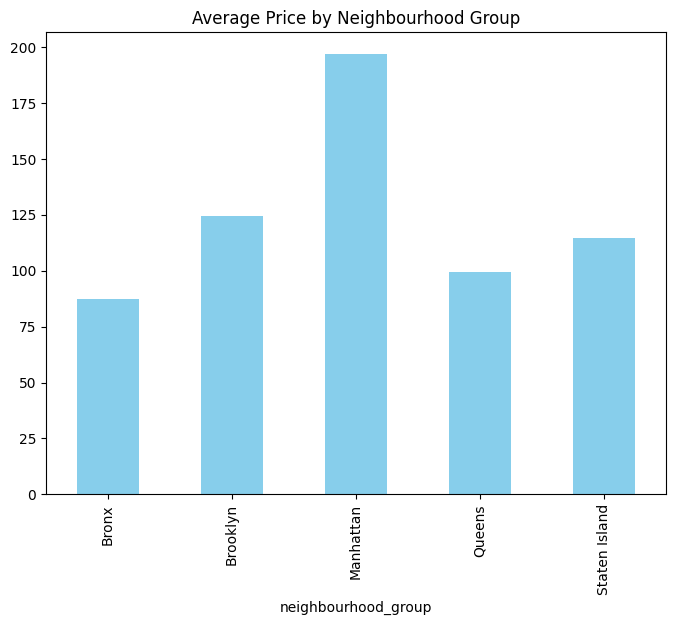

In [37]:
# Plotting the results
plt.figure(figsize=(8, 6))

avg_price_by_neighbourhood_group.plot(kind='bar', color='skyblue')
plt.title('Average Price by Neighbourhood Group')

Text(0.5, 1.0, 'Average Price by Room Type')

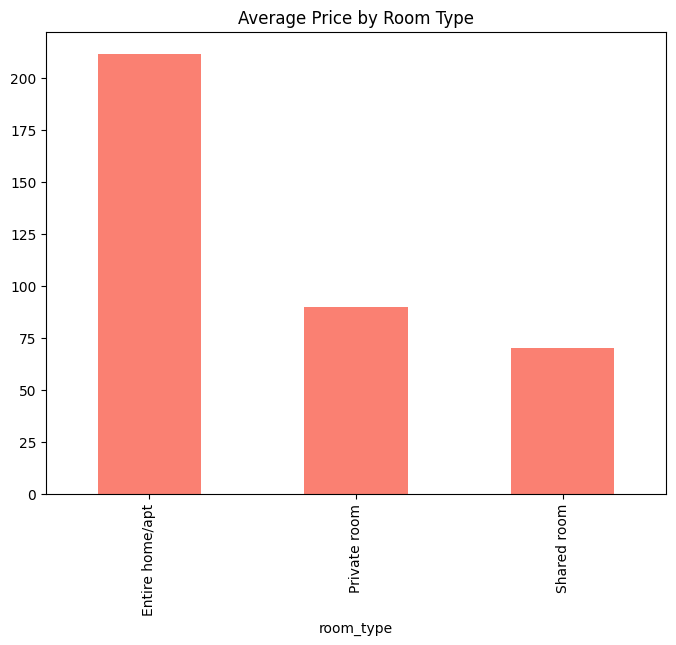

In [38]:
# Plotting the results
plt.figure(figsize=(8, 6))

avg_price_by_room_type.plot(kind='bar', color='salmon')
plt.title('Average Price by Room Type')


Text(0.5, 1.0, 'Average Price by Minimum Nights')

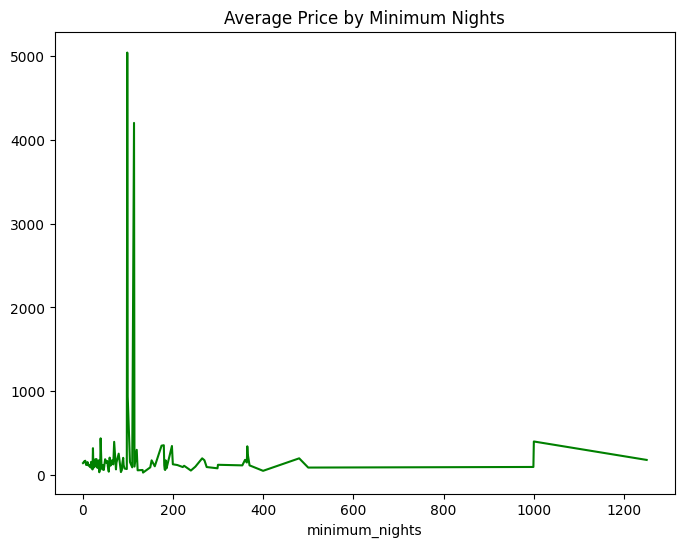

In [39]:
# Plotting the results
plt.figure(figsize=(8, 6))

avg_price_by_minimum_nights.plot(kind='line', color='green')
plt.title('Average Price by Minimum Nights')

Text(0.5, 1.0, 'Average Price by Number of Reviews')

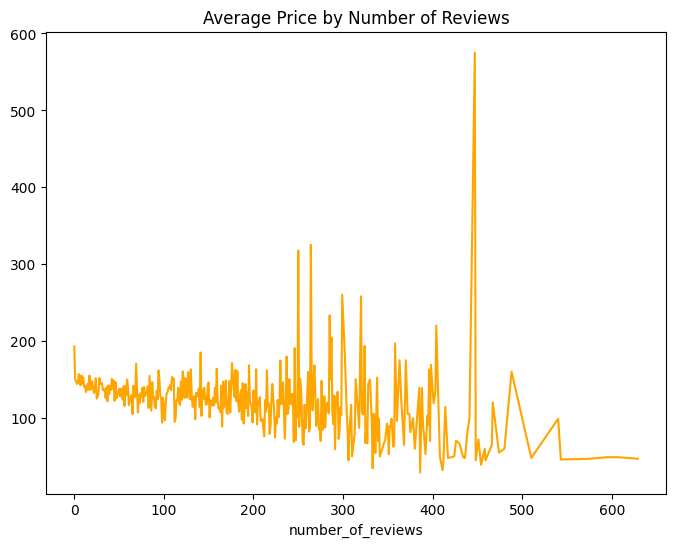

In [40]:
# plotting the results

plt.figure(figsize=(8, 6))
avg_price_by_number_of_reviews.plot(kind='line', color='orange')
plt.title('Average Price by Number of Reviews')

Text(0.5, 1.0, 'Average Price by Availability (in days)')

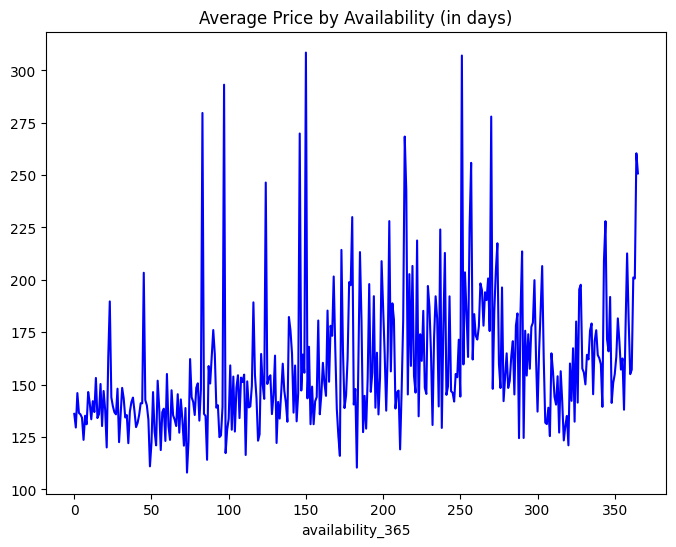

In [57]:
# plotting the results
plt.figure(figsize = (8, 6))

avg_price_by_availability.plot(kind='line', color='blue')
plt.title('Average Price by Availability (in days)')

Text(0.5, 1.0, 'Average Price by Reviews per Month')

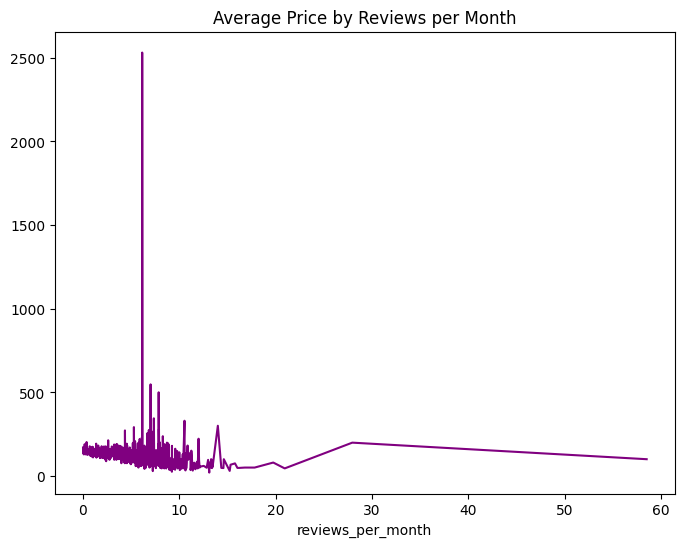

In [42]:
# plotting the results
plt.figure(figsize=(8, 6))

avg_price_by_reviews_per_month.plot(kind='line', color='purple')
plt.title('Average Price by Reviews per Month')

#4. Availability of Listings across Neighborhoods and Minimum Nights Stay:

<ipython-input-43-9d06f4783ccc>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  availability_neighborhood = airbnb_df[['neighbourhood_group', 'minimum_nights', 'availability_365']].corr()


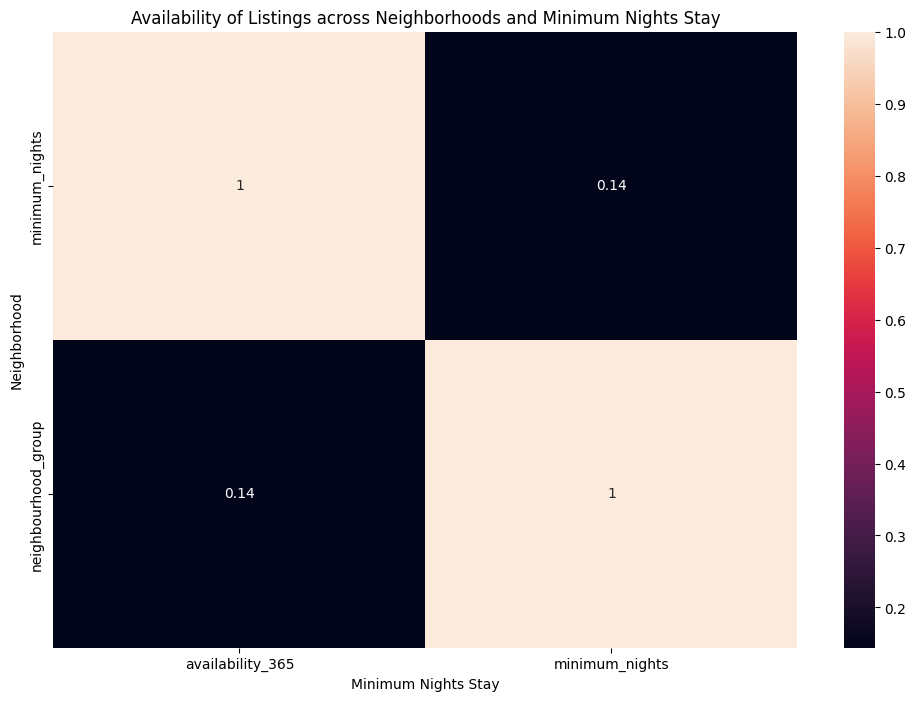

In [43]:
''' we are Using  a heatmap to visualize the availability of listings (availability_365) across different neighborhoods
 and the minimum number of nights stay required This can help understand the relationship between neighborhood
 popularity, minimum nights stay, and listing availability.'''


# Step 1: Filter the relevant columns
availability_neighborhood = airbnb_df[['neighbourhood_group', 'minimum_nights', 'availability_365']].corr()

# Step 2: Pivot the DataFrame to create a matrix for heatmap
heatmap_data = availability_neighborhood.pivot_table(index='neighbourhood_group', columns='minimum_nights', values='availability_365')

# Step 3: Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True)
plt.title('Availability of Listings across Neighborhoods and Minimum Nights Stay')
plt.xlabel('Minimum Nights Stay')
plt.ylabel('Neighborhood')
plt.show()

#5. Now i want to find that which are top 10 airbnb homestays on the basis of reviews per month.. so that tourist can stay more there

In [44]:
# Sort the DataFrame based on 'reviews_per_month' column in descending order
top_hosts = airbnb_df.sort_values('reviews_per_month', ascending=False).head(10)

# Select only the 'host_name' and 'name' columns from the top 10 rows
top_hosts_info = top_hosts[['host_name', 'name']]

print(top_hosts_info)


      host_name                                               name
42075   Row NYC  Enjoy great views of the City in our Deluxe Room!
42076   Row NYC           Great Room in the heart of Times Square!
38870    Louann                 Lou's Palace-So much for so little
27287   Nalicia  JFK Comfort.5 Mins from JFK Private Bedroom & ...
28651   Nalicia      JFK 2 Comfort 5 Mins from JFK Private Bedroom
29628   Nalicia      JFK 3 Comfort 5 Mins from JFK Private Bedroom
20403  Danielle  Cozy Room Family Home LGA Airport NO CLEANING FEE
22469  Danielle  Cute Tiny Room Family Home by LGA NO CLEANING FEE
36238     Brent                                 “For Heaven Cakes”
40297  Lakshmee        Studio Apartment 6 minutes from JFK Airport


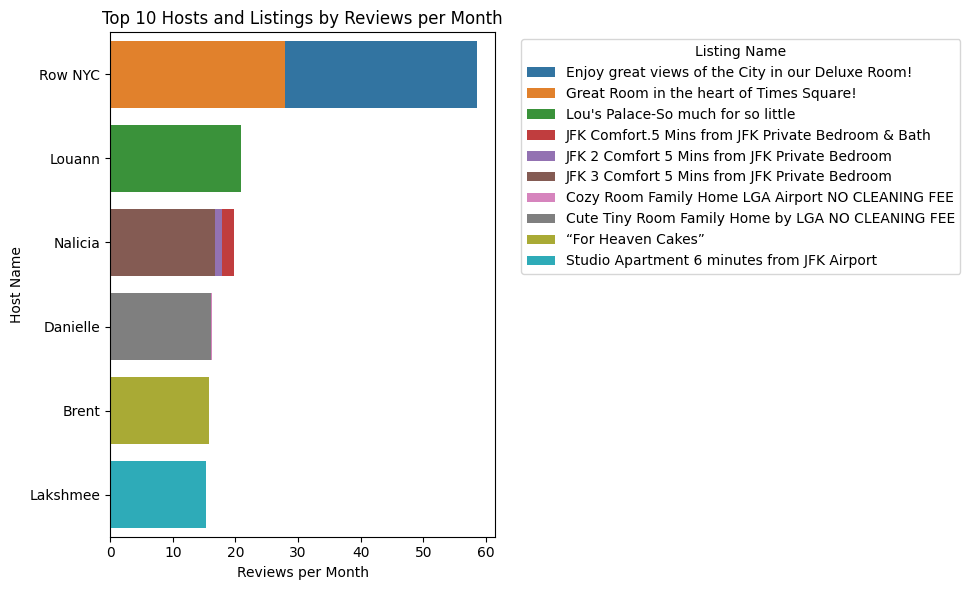

In [45]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_hosts, y='host_name', x='reviews_per_month', hue='name', dodge=False)
plt.xlabel('Reviews per Month')
plt.ylabel('Host Name')
plt.title('Top 10 Hosts and Listings by Reviews per Month')
plt.legend(title='Listing Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#6. Relationship between Price and Reviews per Month:

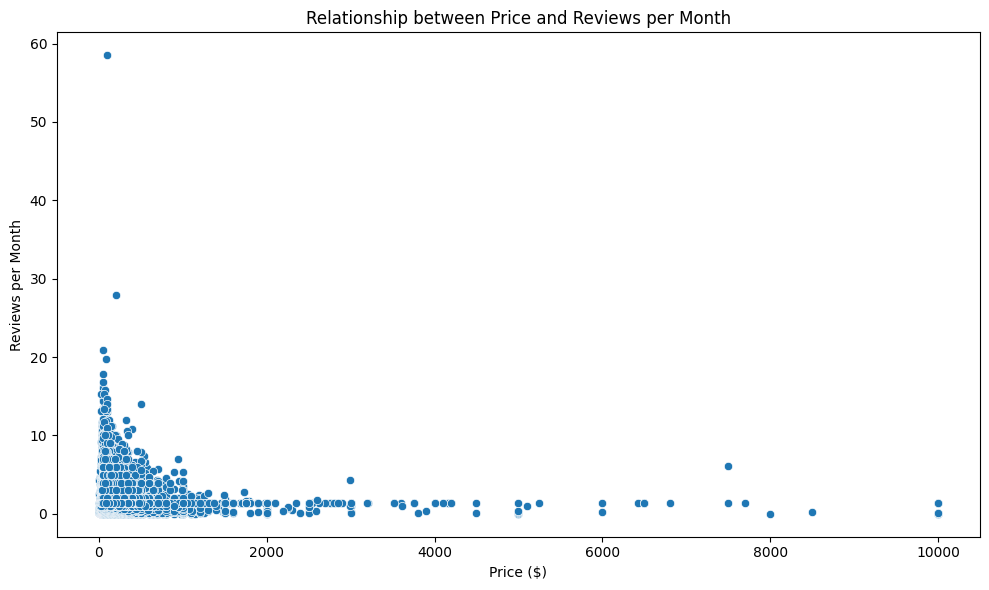

In [46]:
'''Investigating how the price of listings relates to the average number of reviews per month they receive.
also Using  a scatterplot to visualize this relationship and consider creating a heatmap to display the correlation between these variables.'''


# Create a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=airbnb_df, x='price', y='reviews_per_month')
plt.xlabel('Price ($)')
plt.ylabel('Reviews per Month')
plt.title('Relationship between Price and Reviews per Month')
plt.tight_layout()
plt.show()



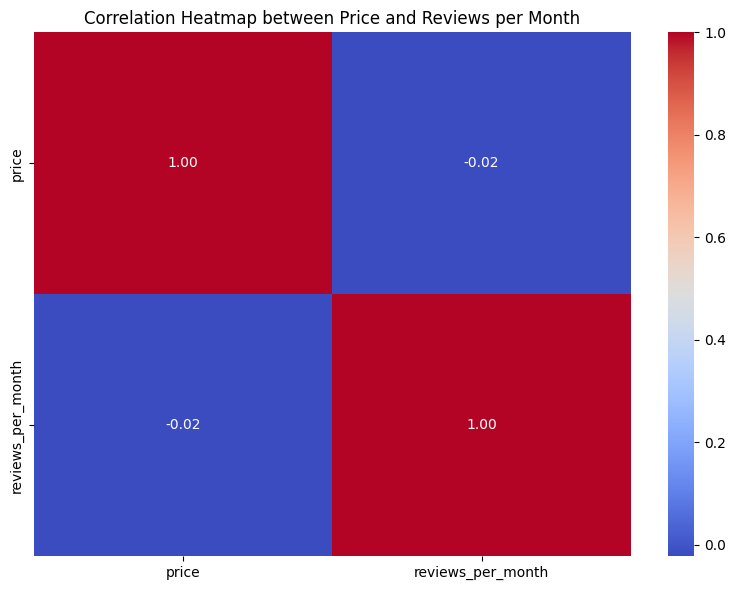

In [47]:
# Create a heatmap to display correlation
plt.figure(figsize=(8, 6))
sns.heatmap(airbnb_df[['price', 'reviews_per_month']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Price and Reviews per Month')
plt.tight_layout()
plt.show()

#7. Now trying to find out which neighbourhood group got the maximum reviews

In [48]:
neighborhood_reviews = airbnb_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values('number_of_reviews',ascending = False,)


neighborhood_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


#8. what we can learn from the different host and areas

In [49]:
airbnb_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index().sort_values('calculated_host_listings_count',ascending = False).head(10)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1833,Blueground,Brooklyn,232
1834,Blueground,Manhattan,232
7275,Kara,Manhattan,121
7479,Kazuya,Manhattan,103
7480,Kazuya,Queens,103
7478,Kazuya,Brooklyn,103
6540,Jeremy & Laura,Manhattan,96
13216,Sonder,Manhattan,96
2901,Corporate Housing,Manhattan,91


#9. now lets find out the correlation for numerical values

<ipython-input-50-328584e3661d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = airbnb_df.corr(method = 'kendall')


<Axes: >

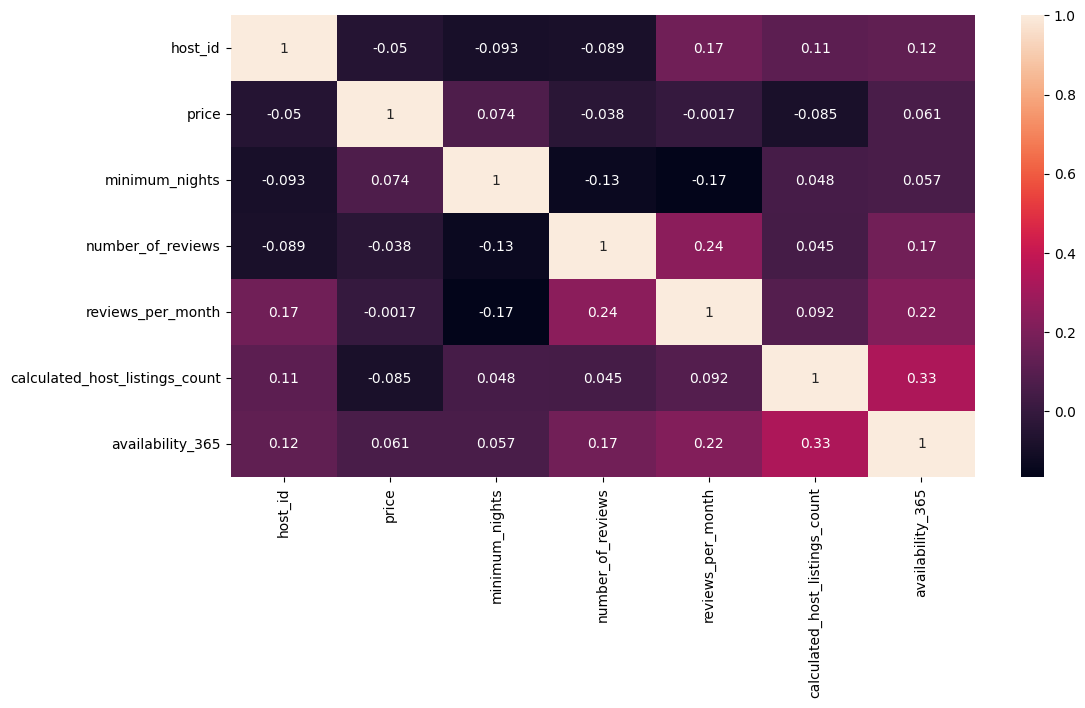

In [50]:
corr = airbnb_df.corr(method = 'kendall')
fig = plt.figure(figsize = (12, 6))
sns.heatmap(corr,annot = True)

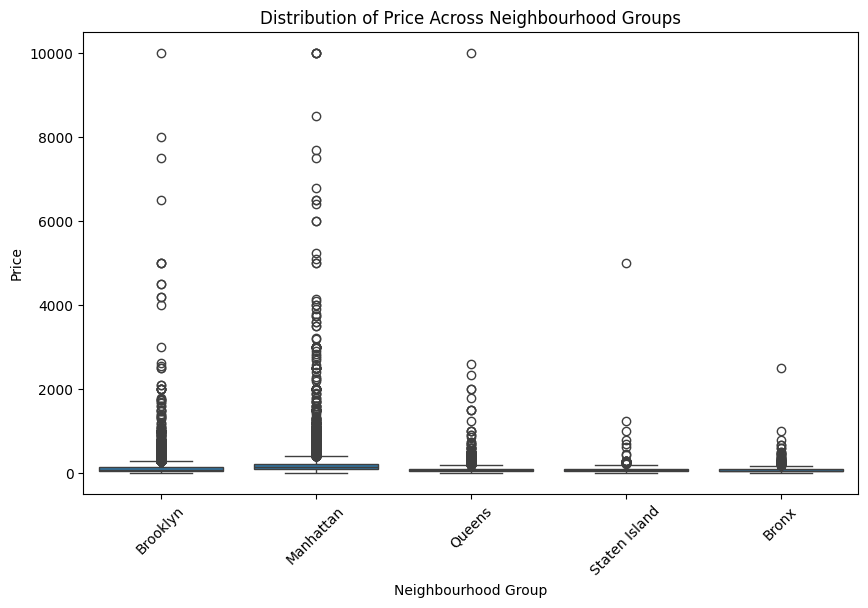

In [51]:
''' 10 This code will create a box plot showing the distribution of prices across different neighbourhood groups.
Each box represents the interquartile range (IQR) of prices within a neighbourhood group, with the line inside
the box representing the median price.
 Any outliers are shown as individual points outside the whiskers of the box plot.'''


# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=airbnb_df, x='neighbourhood_group', y='price')

# Set the title and labels
plt.title('Distribution of Price Across Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


#11. as i want to extract what are the busiest times of the year for bookings

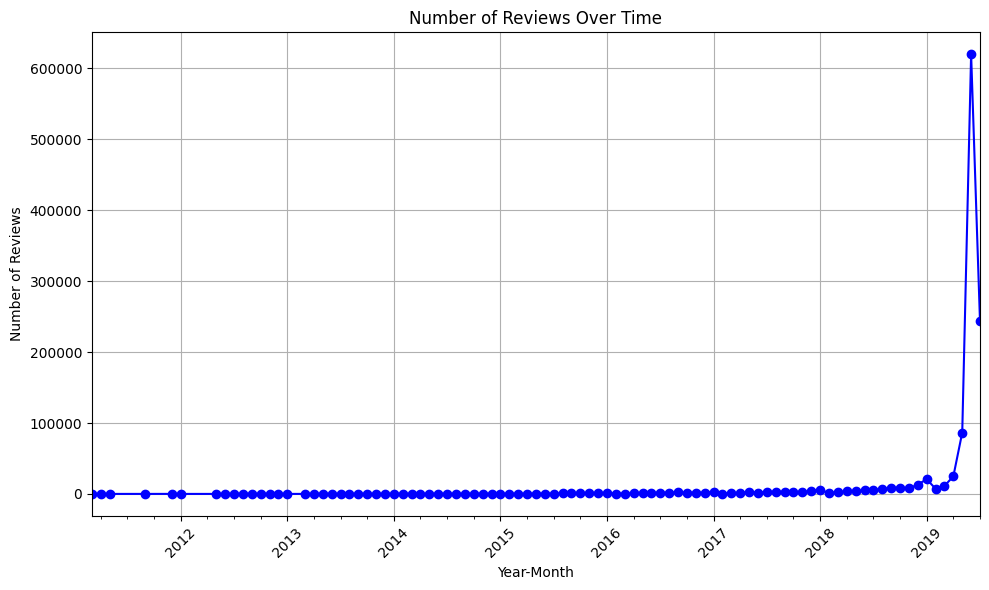

In [52]:
# Extract the month and year from the 'last_review' column
airbnb_df['year_month'] = airbnb_df['last_review'].dt.to_period('M')

# Group by year_month and calculate the total number of reviews
reviews_by_month = airbnb_df.groupby('year_month')['number_of_reviews'].sum()

# Plot the number of reviews over time
plt.figure(figsize=(10, 6))
reviews_by_month.plot(kind='line', marker='o', color='blue')

# Set the title and labels
plt.title('Number of Reviews Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()






This code will create a line plot showing the trend of the total number of reviews over time. By analyzing this plot, you can identify the busiest times of the year for bookings in the area.

We also take availibility_365 instead of reviews

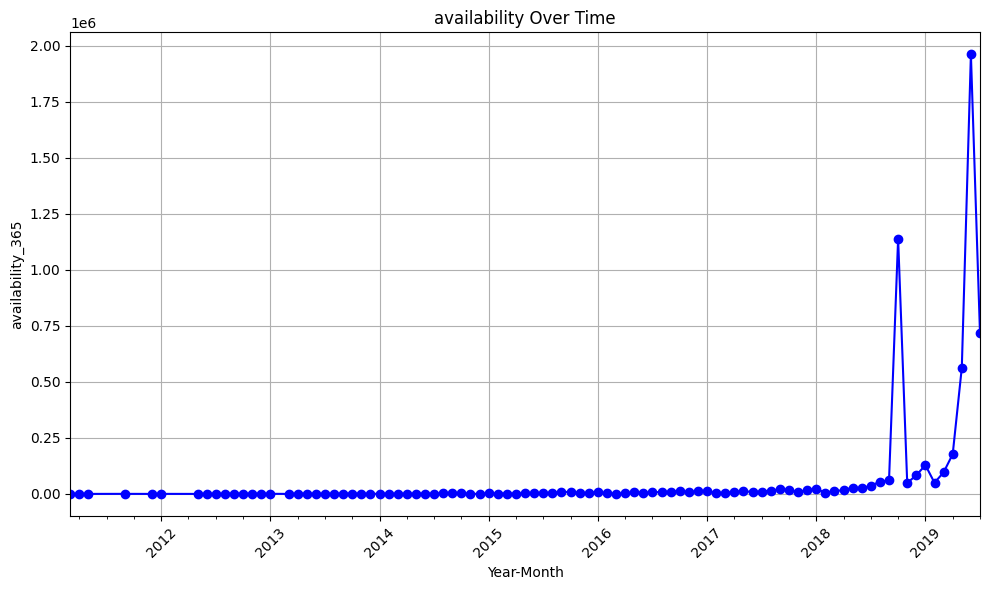

In [53]:
# Group by year_month and calculate availability_365
reviews_by_month = airbnb_df.groupby('year_month')['availability_365'].sum()

# Plot the number of reviews over time
plt.figure(figsize=(10, 6))
reviews_by_month.plot(kind='line', marker='o', color='blue')

# Set the title and labels
plt.title('availability Over Time')
plt.xlabel('Year-Month')
plt.ylabel('availability_365')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


# want to analyze the distribution of the minimum nights required for booking.
# Also want to analyze the distribution of availability days in a year.


# so for that we can create histplot to visualize this.. what is the trend

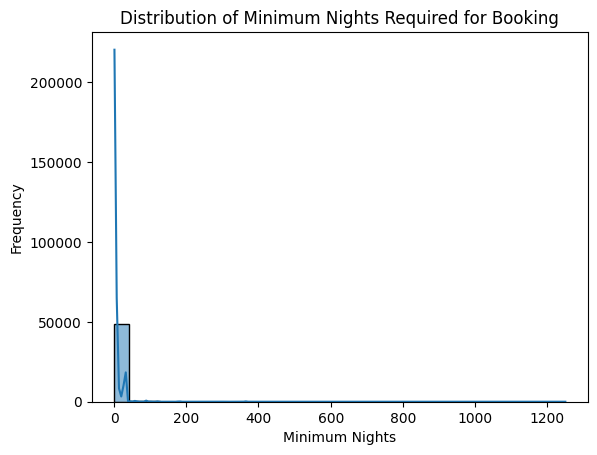

In [54]:
# Plotting the histogram using Seaborn
sns.histplot(data=airbnb_df, x='minimum_nights', bins=30, kde=True)
plt.title('Distribution of Minimum Nights Required for Booking')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.show()


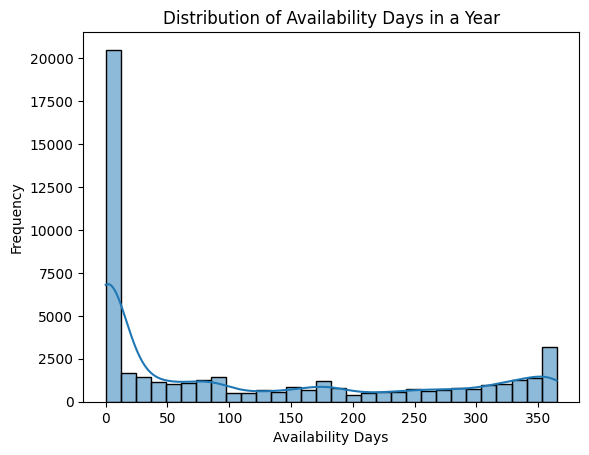

In [55]:
sns.histplot(data=airbnb_df, x='availability_365', bins=30, kde=True)
plt.title('Distribution of Availability Days in a Year')
plt.xlabel('Availability Days')
plt.ylabel('Frequency')
plt.show()


In [56]:
# thank you for watching this!!